# Electricity Load Prediction
## Shivam Pandey | [ShivamPR21](shivampr21.github.io)
### Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### Let's Explore the data

In [2]:
# Describe the path to dataset
path = "../data/assignment-data.csv"

# Read the dataset with:
## delimiter : ','
## index_col : 0
## header : 0
## parse_dates : [0, 8]
main_df = pd.read_csv(path, delimiter=',', parse_dates=['datetime', 'date'], index_col=0, header=0)

# Let's view a few rows
main_df.head()

datetime       load  apparent_temperature  temperature  humidity  \
0 2018-01-01 00:00:00  803.22270              10.45800     10.45800  0.955500   
1 2018-01-01 00:15:00  774.89523              10.32675     10.32675  0.961625   
2 2018-01-01 00:30:00  731.46927              10.19550     10.19550  0.967750   
3 2018-01-01 00:45:00  713.93870              10.06425     10.06425  0.973875   
4 2018-01-01 01:00:00  699.23007               9.93300      9.93300  0.980000   

   dew_point  wind_speed  cloud_cover       date  
0   8.946000         0.0          0.0 2018-01-01  
1   8.911875         0.0          0.0 2018-01-01  
2   8.877750         0.0          0.0 2018-01-01  
3   8.843625         0.0          0.0 2018-01-01  
4   8.809500         0.0          0.0 2018-01-01

### Separate out prediction, train, and validation data patches

In [3]:
mask = main_df['load'].isna()

# Prediction Split
pred_data = main_df[mask]
pred_data = pred_data.sort_values(by="datetime")

# Useful data
useful_data = main_df.drop(pred_data.index)

# train split
train_data = useful_data.sample(frac=0.9)
train_data = train_data.sort_values(by="datetime")
# validation data
val_data = useful_data.drop(train_data.index)
val_data = val_data.sort_values(by="datetime")

### Visualise the sequence variation

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.titlesize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
mpl.rcParams['agg.path.chunksize'] = 10000

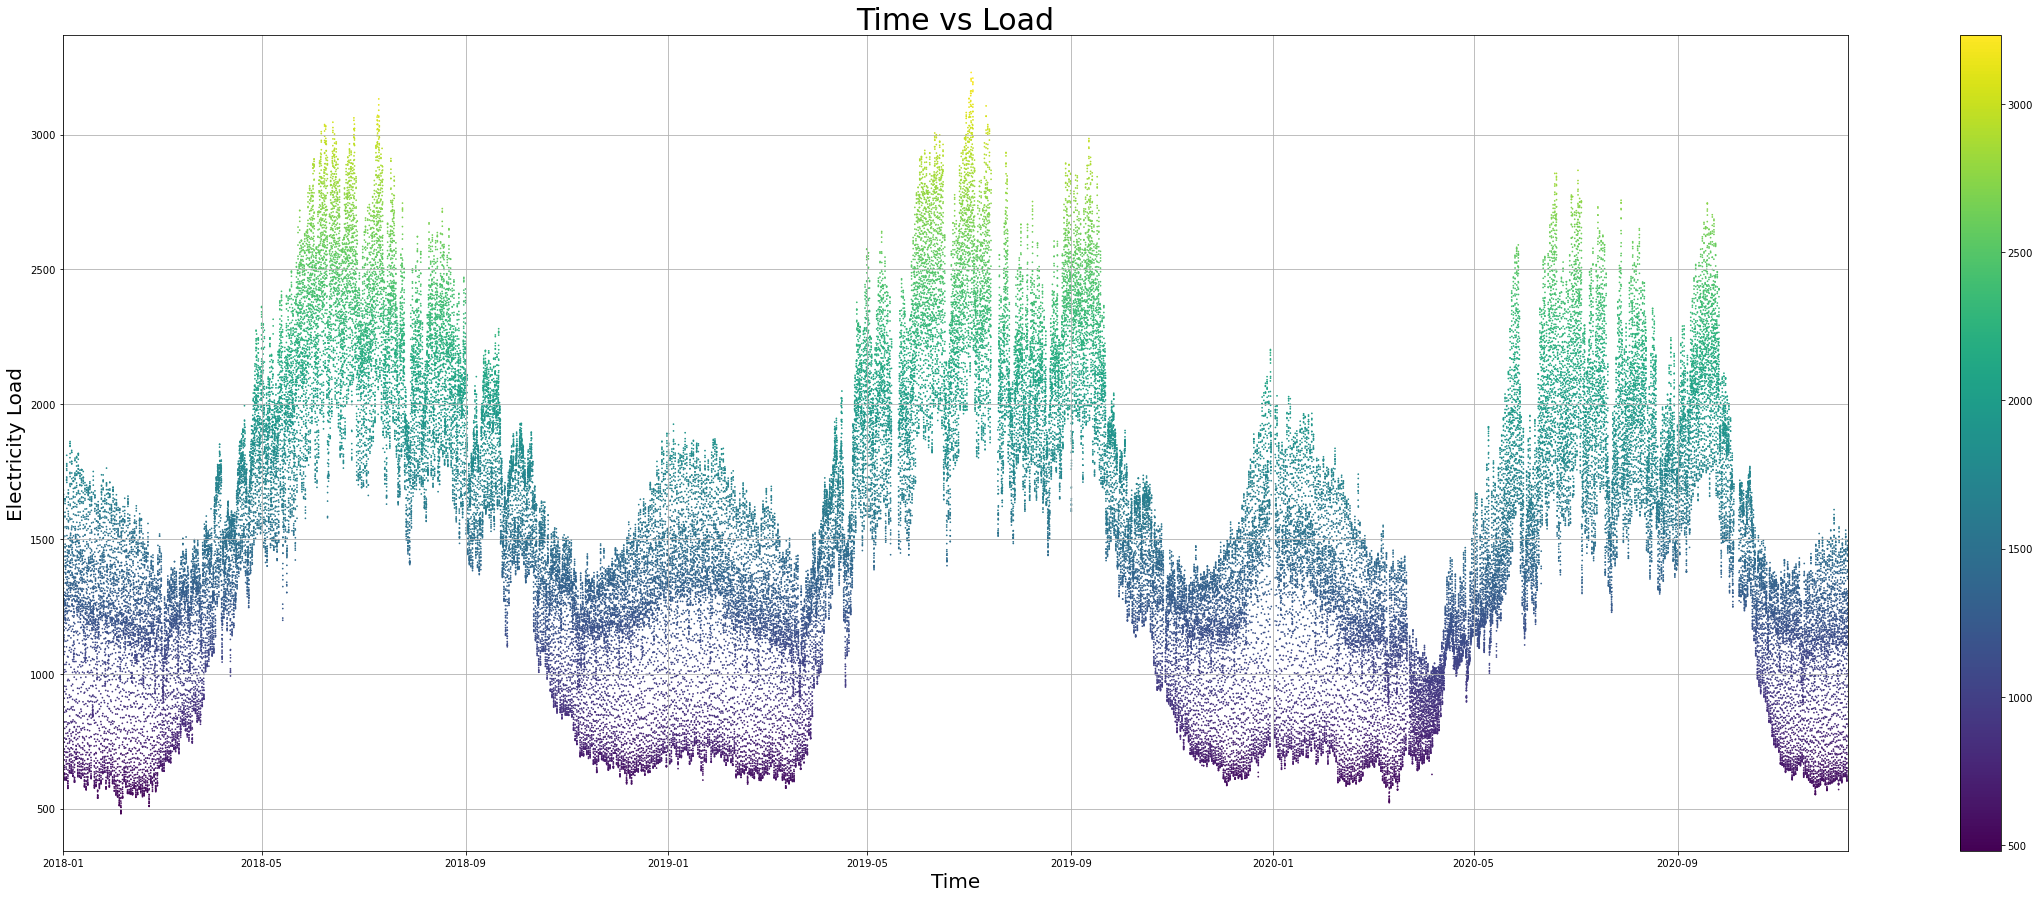

In [5]:
# fig = plt.figure()
plt.title('Time vs Load')
plt.ylabel('Electricity Load')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=train_data['datetime'], y=train_data['load'], c=train_data['load'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data.png')
plt.show()

#### Let's visualize a single year

In [6]:
tmp_data = train_data.copy()
tmp_data = tmp_data.set_index(['datetime'])

# Data 2018
data_2018 = tmp_data.loc["2018-01":"2018-12"]

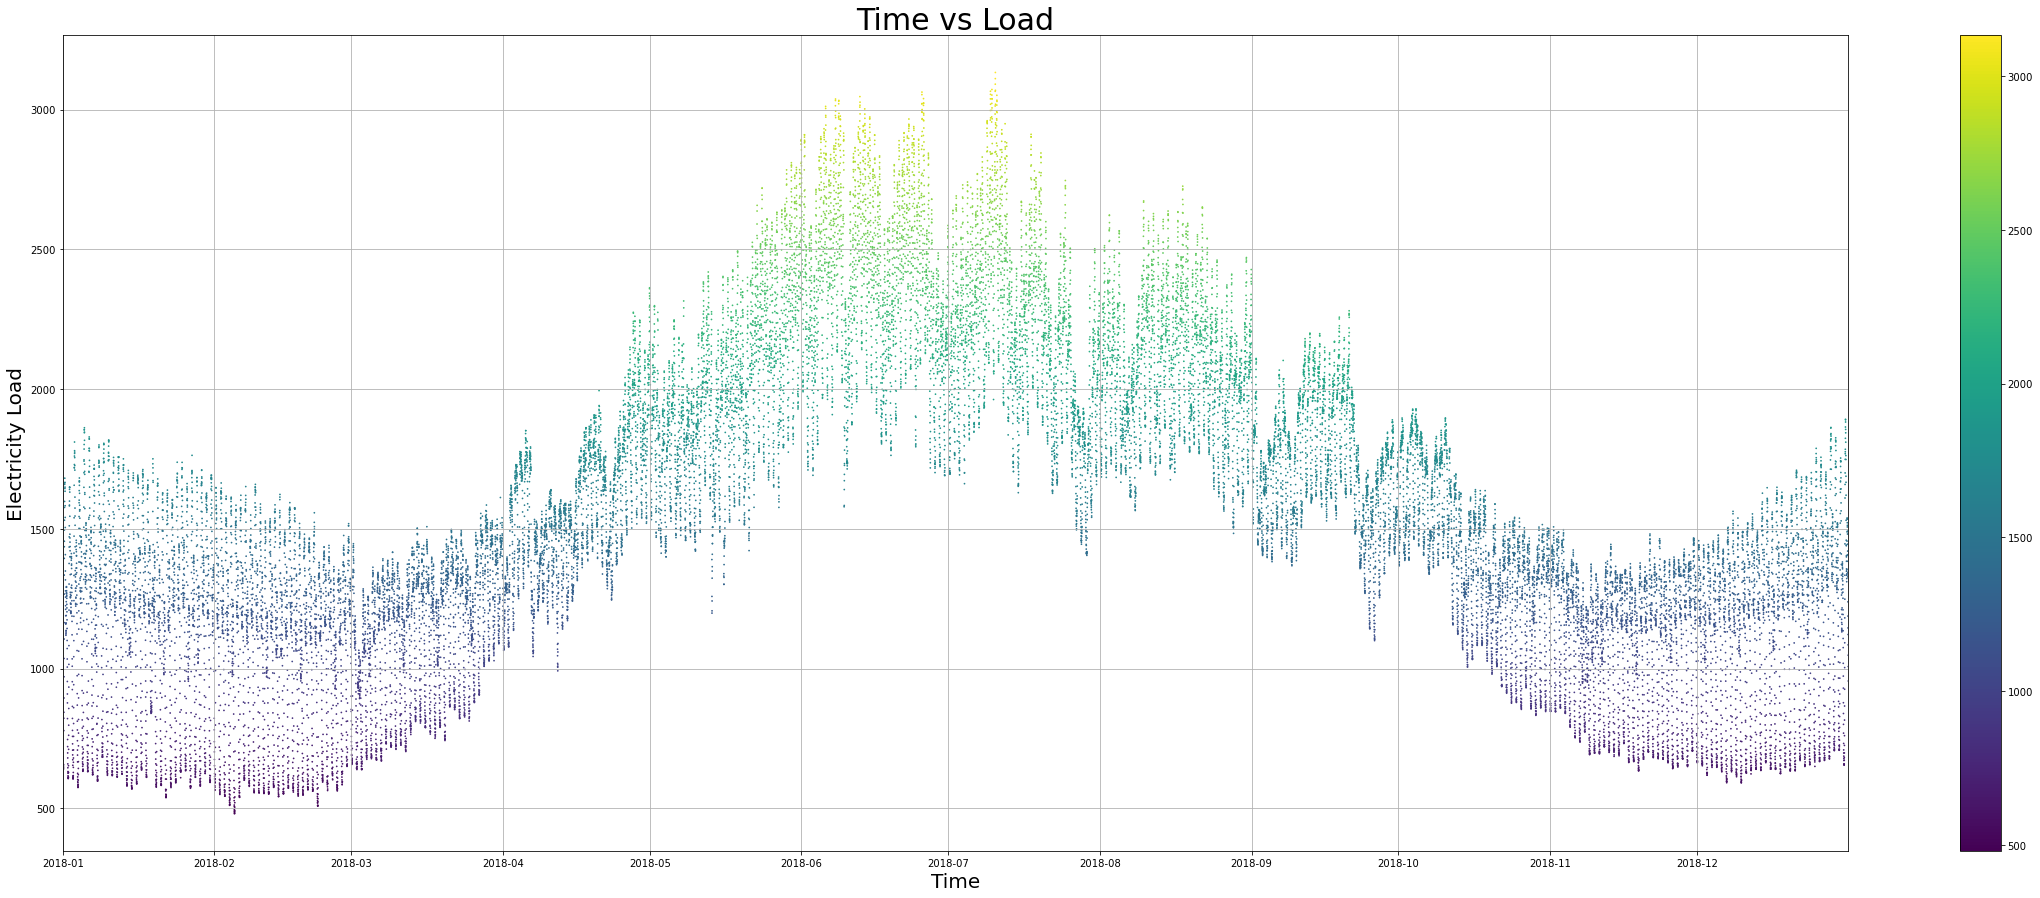

In [7]:
plt.title('Time vs Load')
plt.ylabel('Electricity Load')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=data_2018.index, y=data_2018['load'], c=data_2018['load'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data_2018.png')
plt.show()

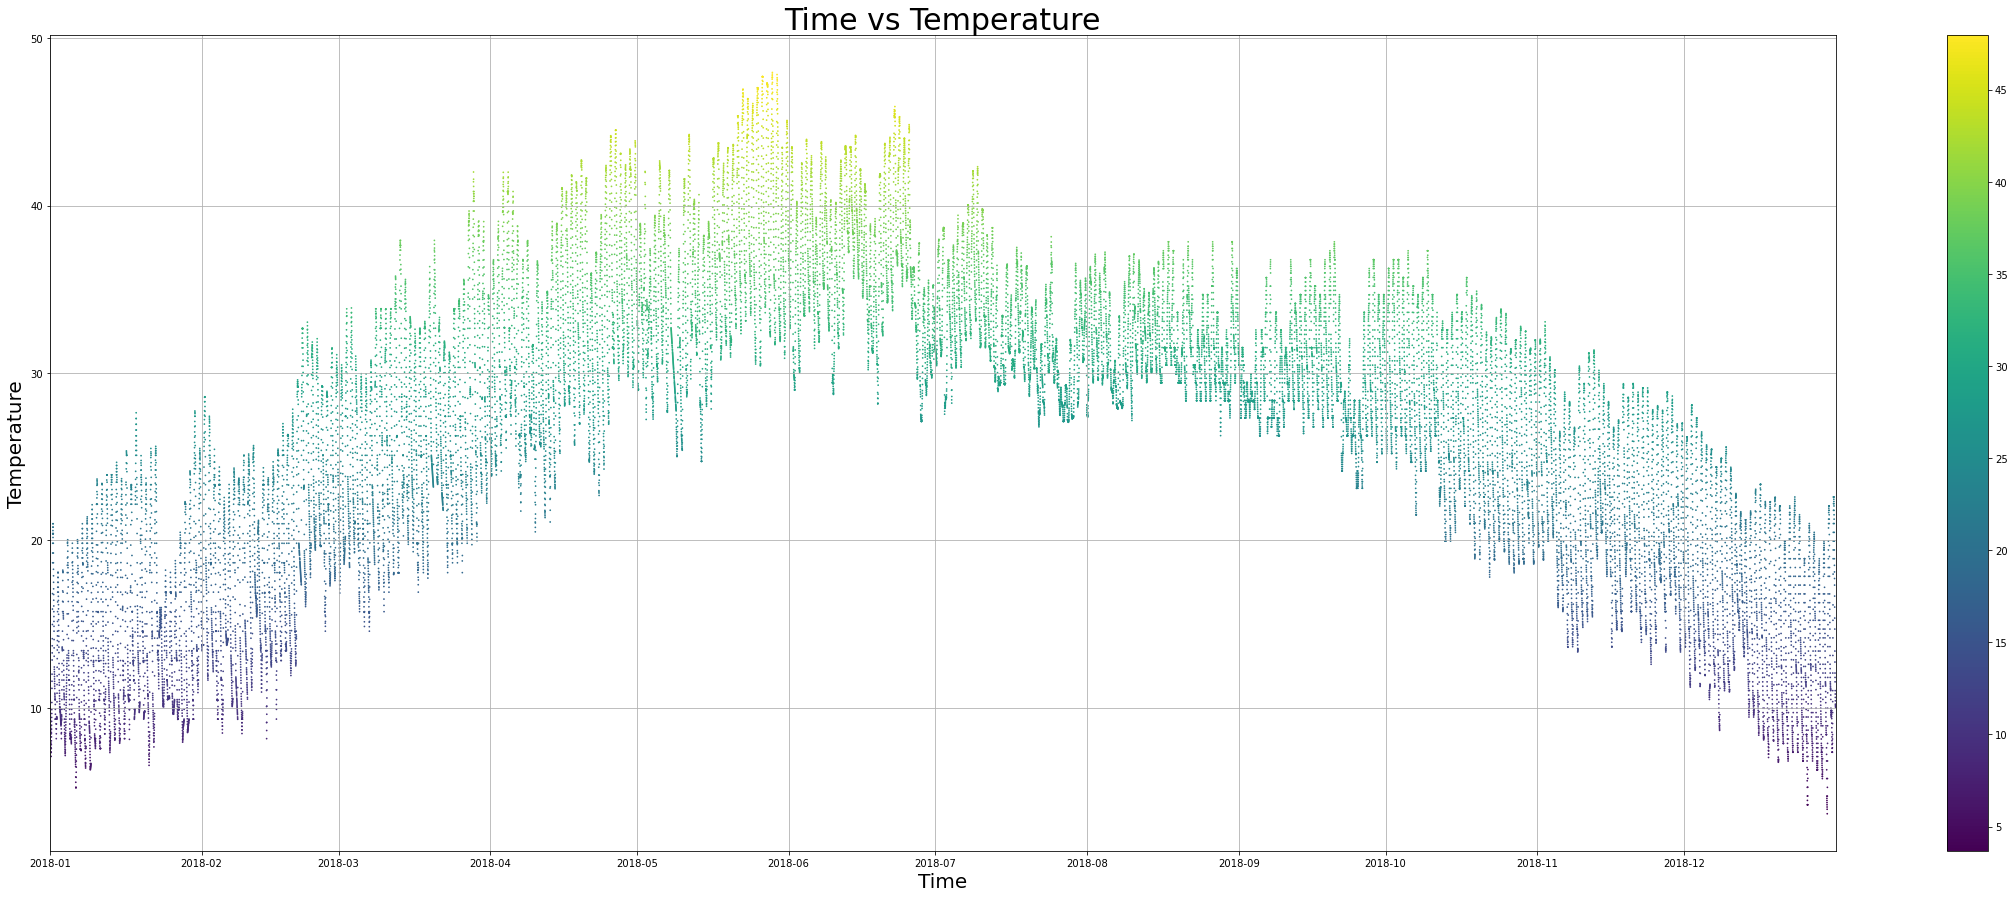

In [8]:
plt.title('Time vs Temperature')
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=data_2018.index, y=data_2018['temperature'], c=data_2018['temperature'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data_2018_temp.png')
plt.show()

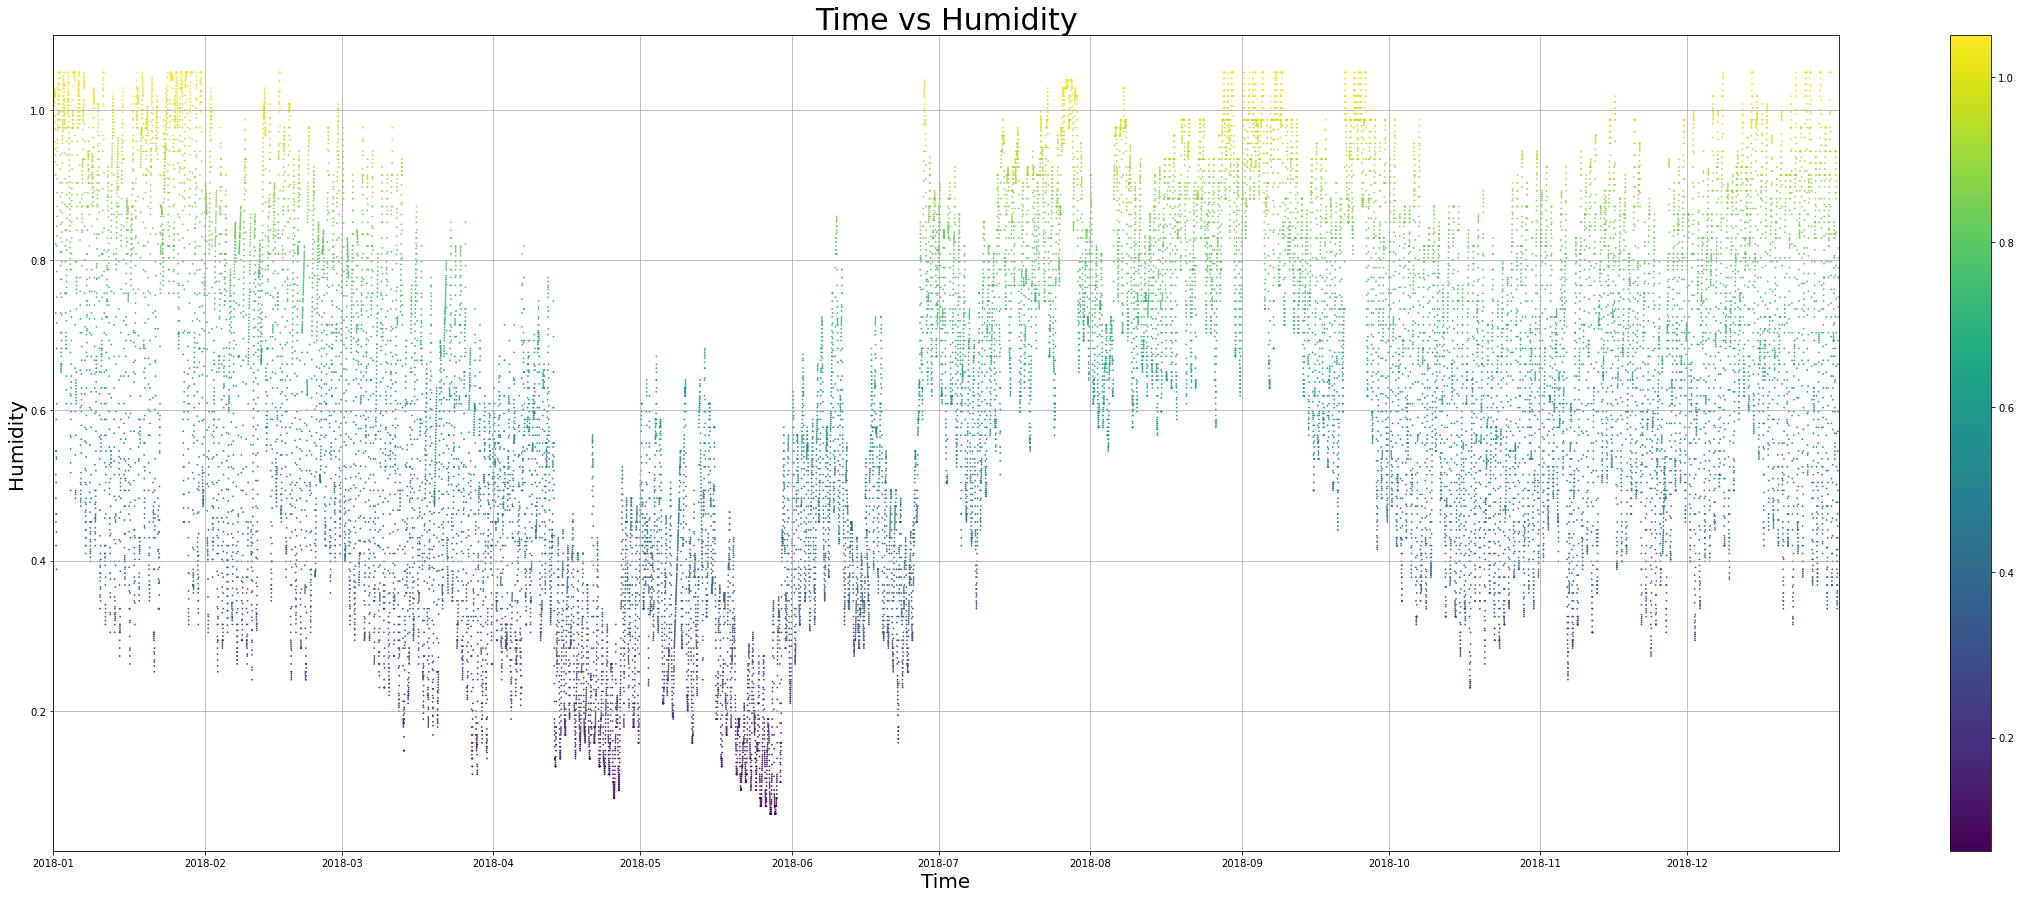

In [9]:
plt.title('Time vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=data_2018.index, y=data_2018['humidity'], c=data_2018['humidity'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data_2018_humidity.png')
plt.show()

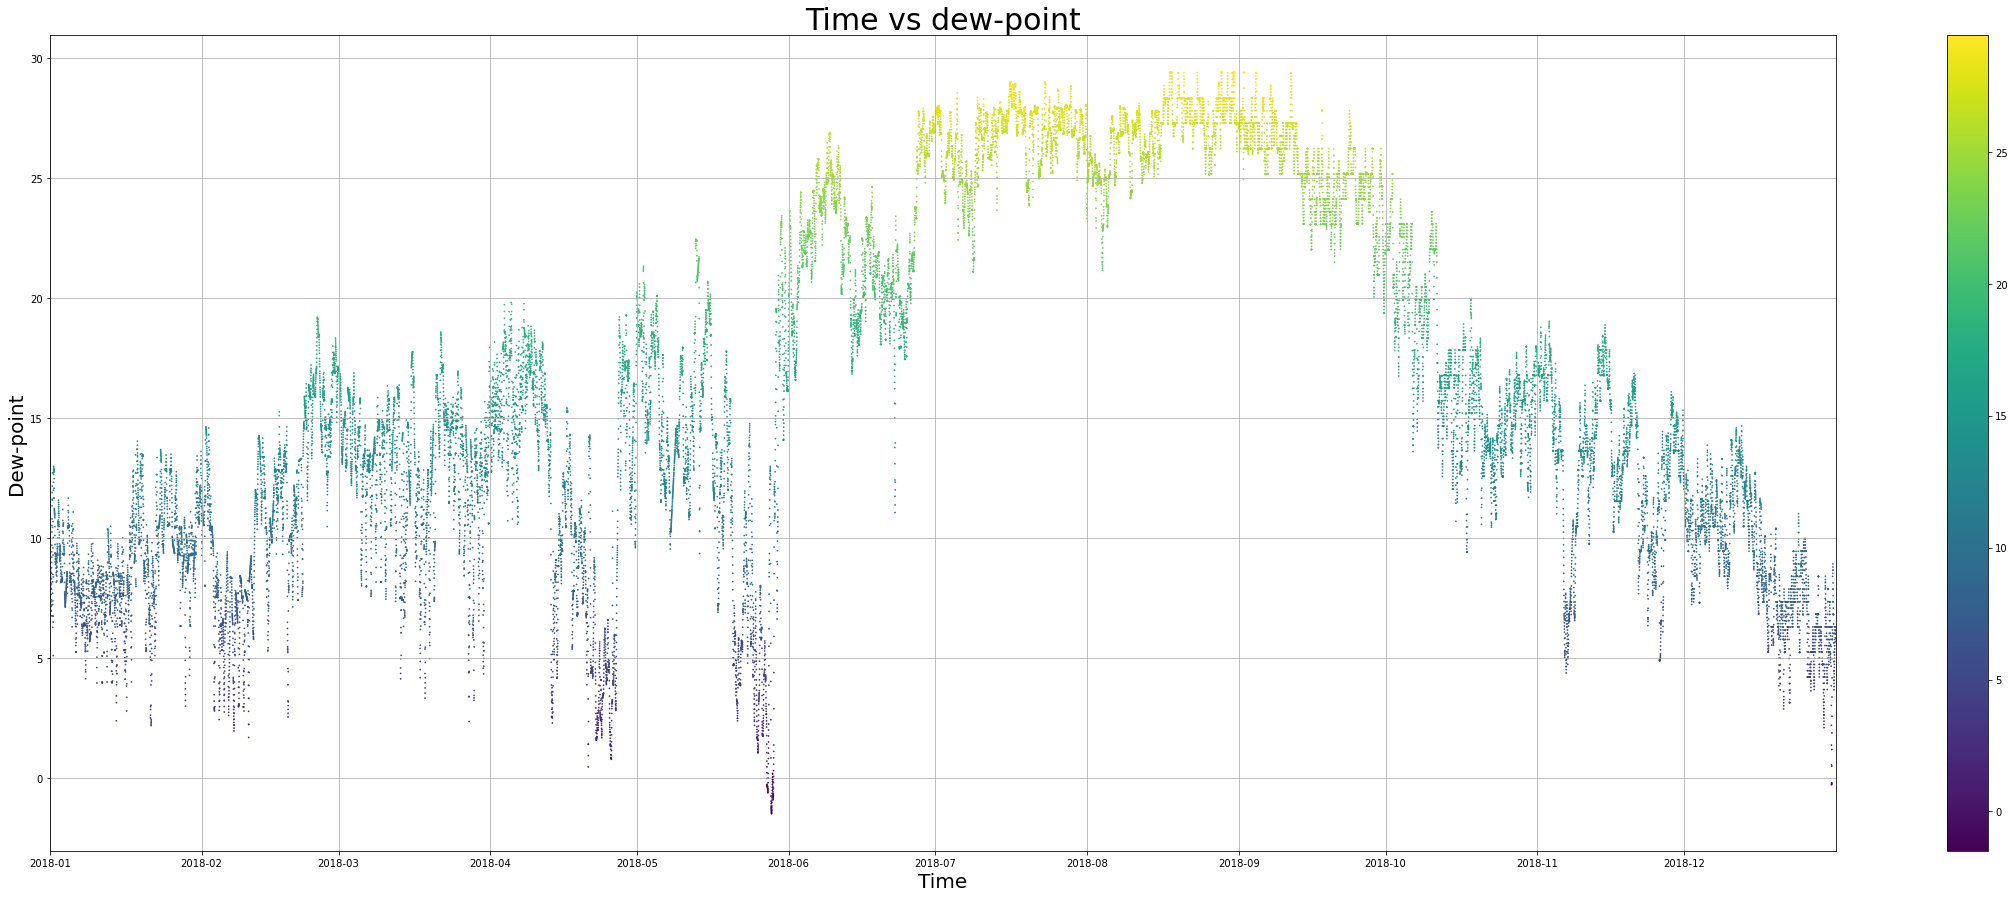

In [10]:
plt.title('Time vs dew-point')
plt.ylabel('Dew-point')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=data_2018.index, y=data_2018['dew_point'], c=data_2018['dew_point'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data_2018_dew_point.png')
plt.show()

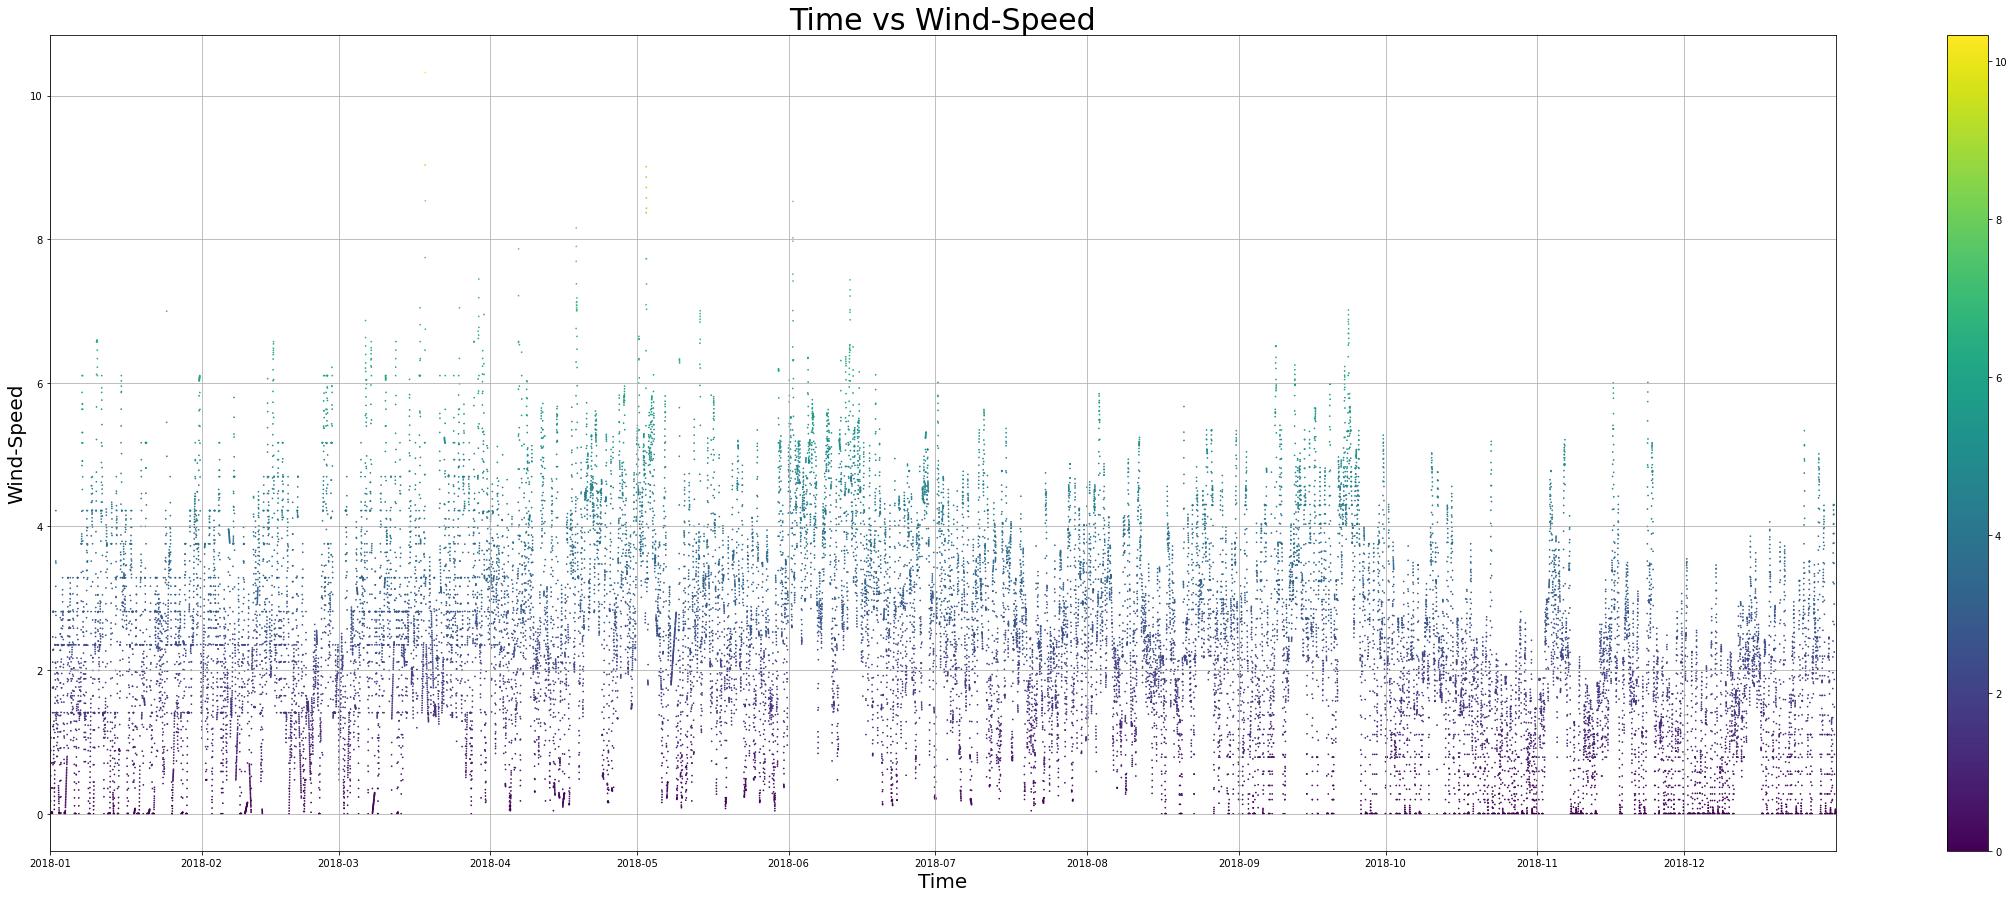

In [11]:
plt.title('Time vs Wind-Speed')
plt.ylabel('Wind-Speed')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=data_2018.index, y=data_2018['wind_speed'], c=data_2018['wind_speed'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data_2018_wind-speed.png')
plt.show()

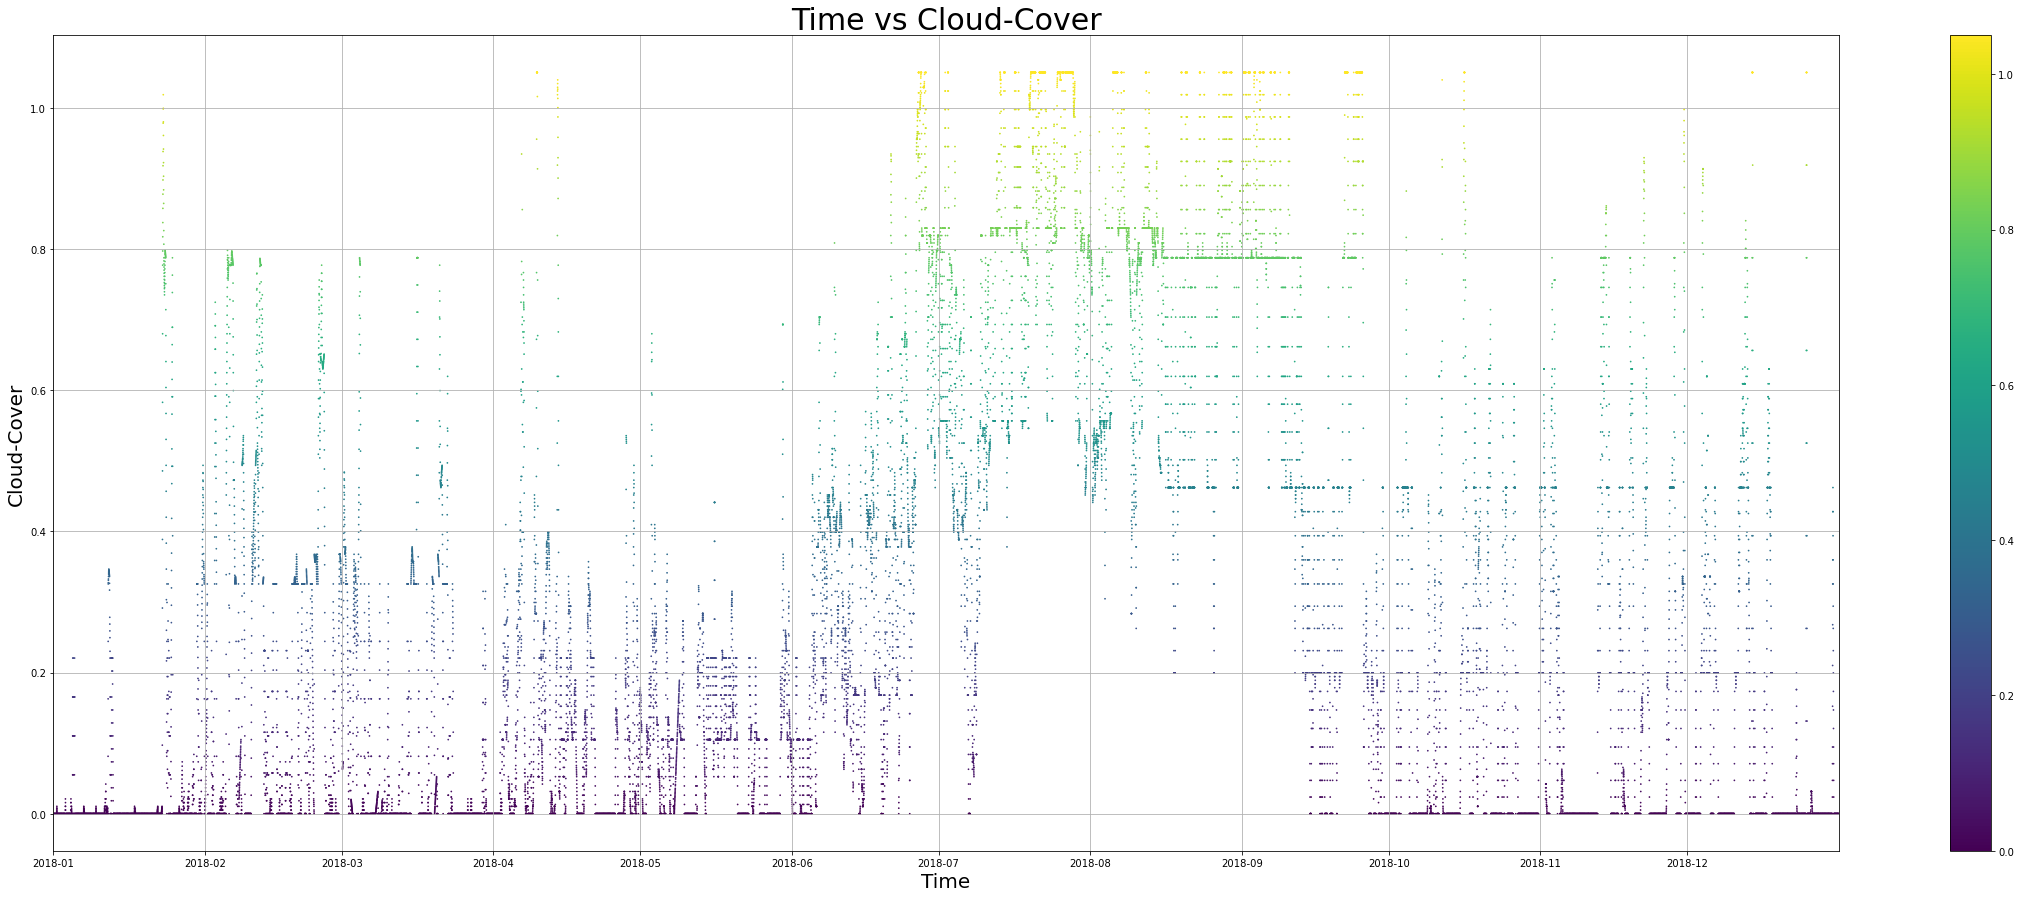

In [12]:
plt.title('Time vs Cloud-Cover')
plt.ylabel('Cloud-Cover')
plt.xlabel('Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.scatter(x=data_2018.index, y=data_2018['cloud_cover'], c=data_2018['cloud_cover'], s=0.5)
plt.colorbar()
plt.savefig('../data/plots/data_2018_cloud-cover.png')
plt.show()

In [39]:
import torch

torch.tensor(data_2018.iloc[0][['load', 'temperature']])

tensor([803.2227,  10.4580], dtype=torch.float64)

In [49]:
i = 10
[data_2018.index[i].year, data_2018.index[i].month, data_2018.index[i].day, data_2018.index[i].hour, data_2018.index[i].minute]

[2018, 1, 1, 2, 30]

In [60]:
new_data = data_2018.copy()
new_data['year'] = pd.Series(data_2018.index.year.values, index=data_2018.index)

In [67]:
new_data.columns

Index(['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_speed', 'cloud_cover', 'date', 'year'],
      dtype='object')